# Sales

In [ ]:
Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as p
import seaborn as sns
import os

# Mergning 12 months of sales data into single CSV file

In [2]:
df=pd.read_csv("C:\\Users\\keshav\\OneDrive\\Desktop\\Sales_Data\\Sales_April_2019.csv")

files=[file for file in os.listdir("C:\\Users\\keshav\\OneDrive\\Desktop\\Sales_Data")]
all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("C:\\Users\\keshav\\OneDrive\\Desktop\\Sales_Data\\"+file)
    all_months_data=pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)


In [3]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Read in updated dataframe

In [4]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the data!

In [5]:
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
95,176648,27in FHD Monitor,1,149.99,04/24/19 01:17,"732 2nd St, Portland, OR 97035"
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016"
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215"
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215"


Drop rows of NAN

In [31]:
nan_df= all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data=all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9,27


## Find "OR" and Delete It

In [44]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

AttributeError: Can only use .str accessor with string values!

Convert Columns to the correct type

In [8]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"]) # Make int
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"]) # Make Float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Task3: Add a sales column

In [9]:
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [11]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Sales               0
dtype: int64

## Augment data with additional columns

##Task 2: Add month column

In [10]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype("int")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


### Add Month Colum (Alterntive Method)

Question 1:What was the best month for sales? How much was earned that month? 

In [15]:
results=all_data.groupby("Month").sum()

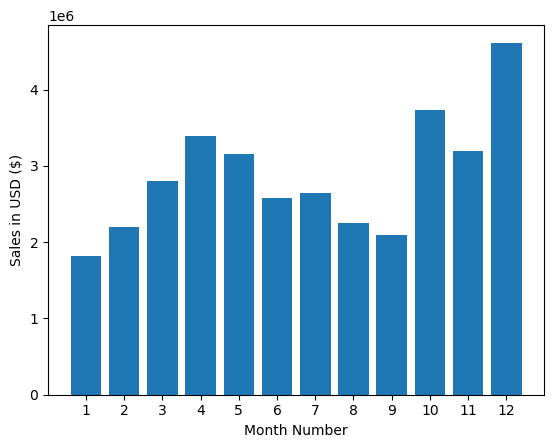

In [16]:
months=range(1,13)

p.bar(months,results["Sales"])
p.xticks(months)
p.ylabel("Sales in USD ($)")
p.xlabel("Month Number")
p.show()

Task4:Add City Column

In [17]:
# Let's use .apply()
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"]=all_data["Purchase Address"].apply(lambda x:f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


Q2. What city had the highest number of sales?

In [18]:
result=all_data.groupby("City").sum()
result.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
City,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",2795498.58,104794
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",1819581.75,69829
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",3661642.01,141112
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",2767975.40,104620
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",5452570.80,208325


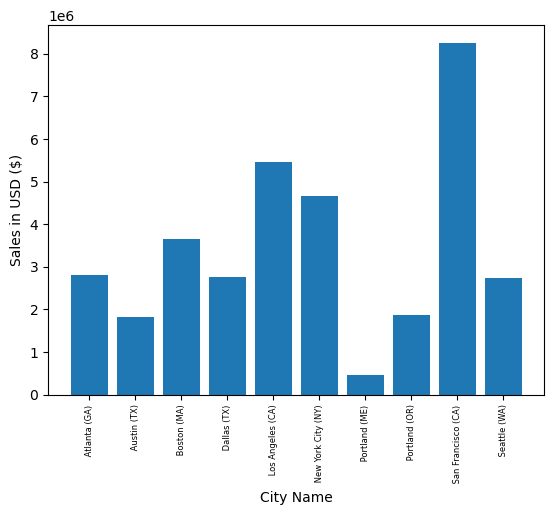

In [20]:
cities=[city for city, df in all_data.groupby("City")]

p.bar(cities,result["Sales"])
p.xticks(cities,rotation="vertical",size=6)
p.ylabel("Sales in USD ($)")
p.xlabel("City Name")
p.show()

Q3. What time should we display advertisments to maximize likelihood of customer's buying product?

In [57]:
all_data["Order Date"]= pd.to_datetime(all_data["Order Date"]).astype("int64")   

In [58]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute
all_data.head()

AttributeError: Can only use .dt accessor with datetimelike values

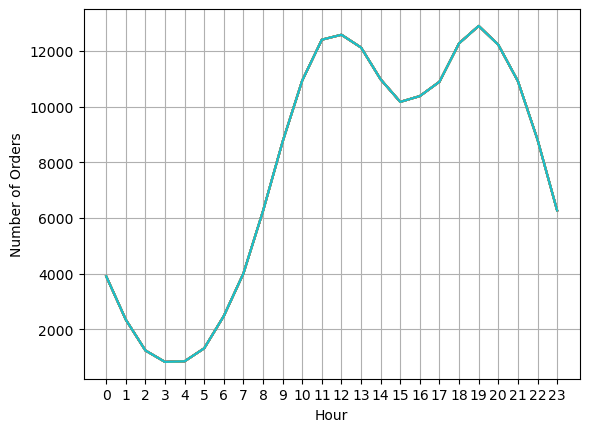

In [25]:
hours=[hour for hour, df in all_data.groupby("Hour")]

p.plot(hours,all_data.groupby(["Hour"]).count())
p.xticks(hours)
p.grid()
p.xlabel("Hour")
p.ylabel("Number of Orders")
p.show()

# My recommendation is around 11am (11) or 7pm (19)

Q4. What products are most often sold together?

In [21]:
df=all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x:','.join(x))

df=df[["Order ID","Grouped"]].drop_duplicates()

df.head()

C:\Users\keshav\AppData\Local\Temp\ipykernel_20552\366147507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [22]:
from itertools import combinations 
from collections import Counter

count=Counter()

for row in df["Grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Q5. What product sold the most?Why do you think it sold the most?

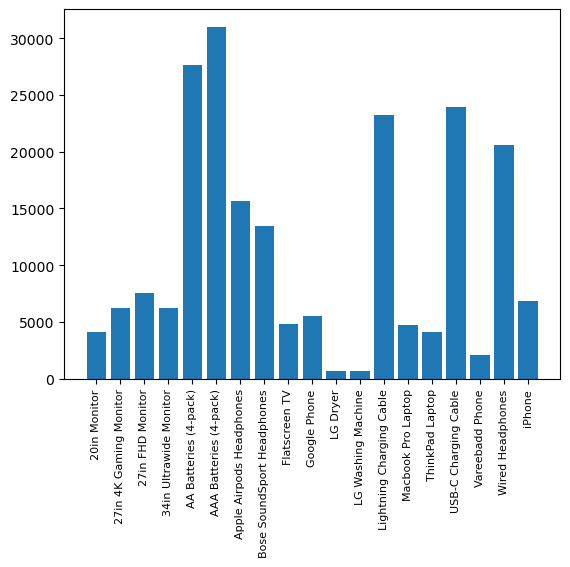

In [60]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
p.bar(keys, quantity_ordered)
p.xticks(keys, rotation='vertical', size=8)
p.show()

In [39]:
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95,4,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",99.99,4,Seattle (WA),7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",11.95,4,Atlanta (GA),10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",1700.00,4,San Francisco (CA),10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",11.99,4,Boston (MA),14,5


C:\Users\keshav\AppData\Local\Temp\ipykernel_20552\2376977771.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\keshav\AppData\Local\Temp\ipykernel_20552\2376977771.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


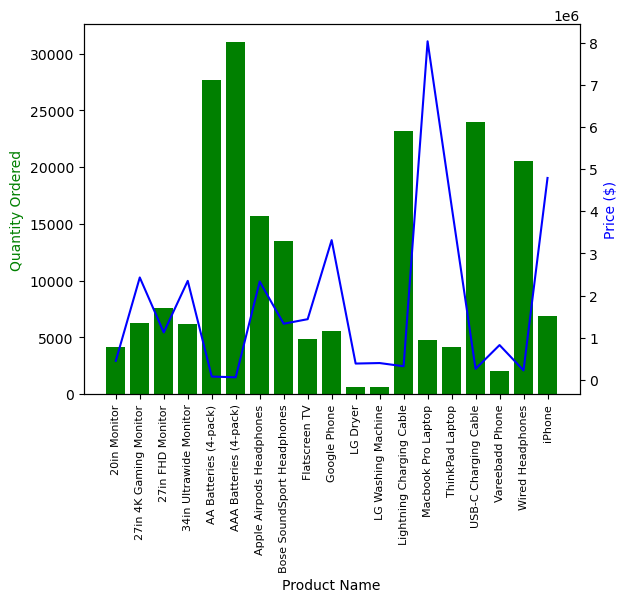

In [64]:
prices = all_data.groupby('Product').sum()['Price Each']

fig, ax1 = p.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()